In [848]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [849]:
data = pd.read_csv("car prices.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [850]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [851]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [852]:
data.drop("Market Category",axis=1, inplace=True)
data.dropna(inplace=True)
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [853]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='MSRP', ylabel='Count'>

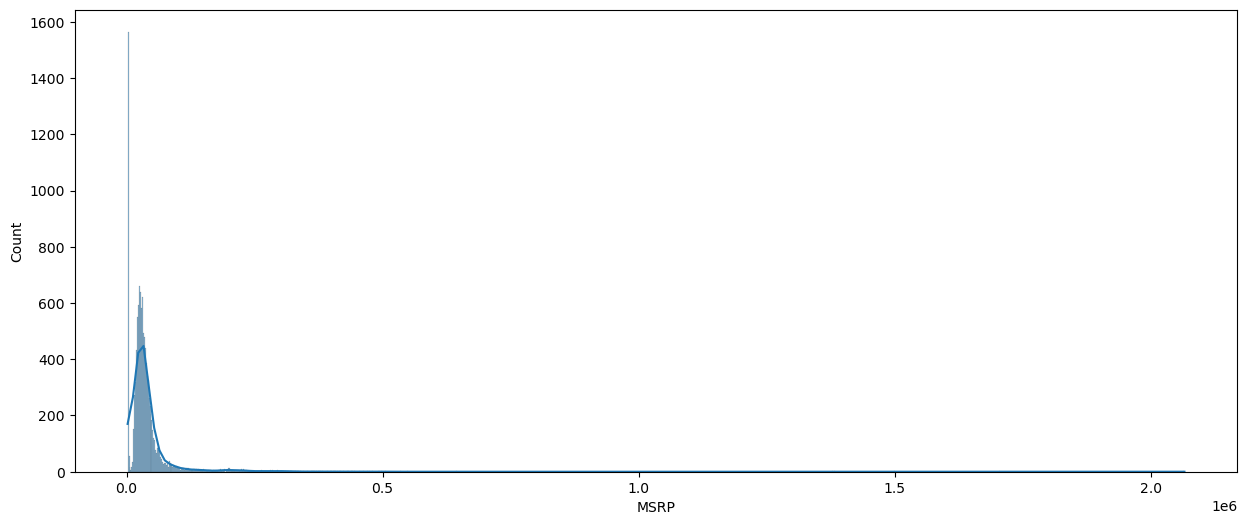

In [854]:
plt.figure(figsize=(15,6))
sns.histplot(data["MSRP"],kde=True)

<Axes: xlabel='log_MSRP', ylabel='Count'>

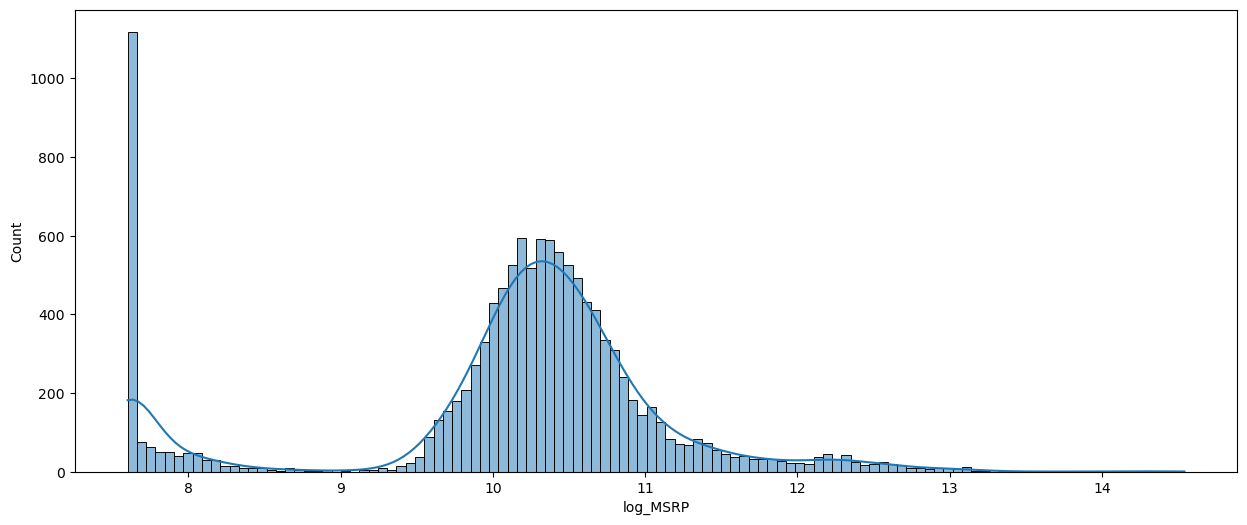

In [855]:
data["log_MSRP"] = np.log(data["MSRP"]+1)
plt.figure(figsize=(15,6))
sns.histplot(data["log_MSRP"],kde=True)

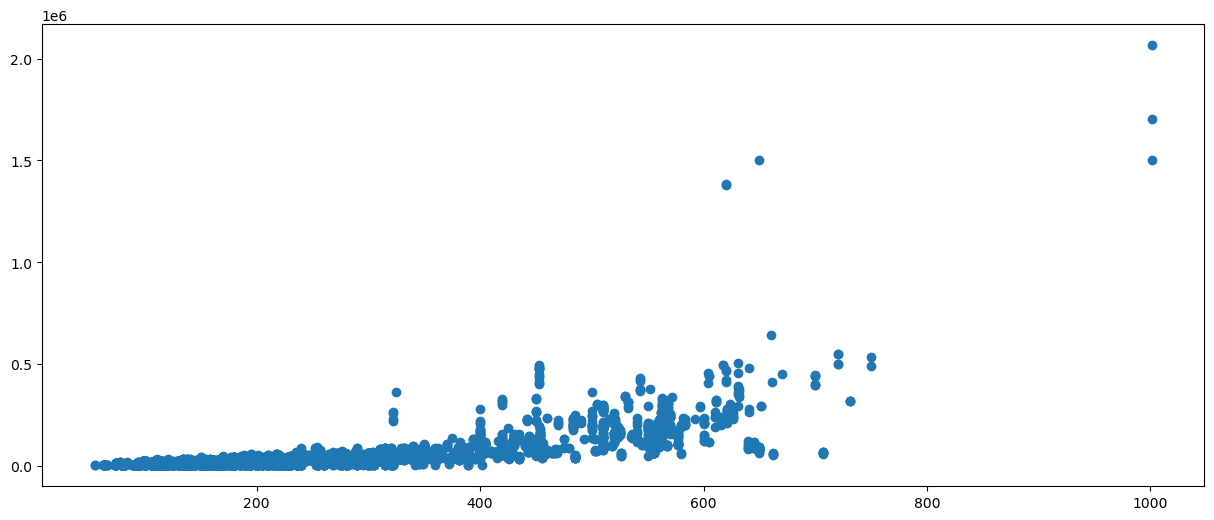

In [856]:
plt.figure(figsize=(15,6))
plt.scatter(data["Engine HP"], data["MSRP"])

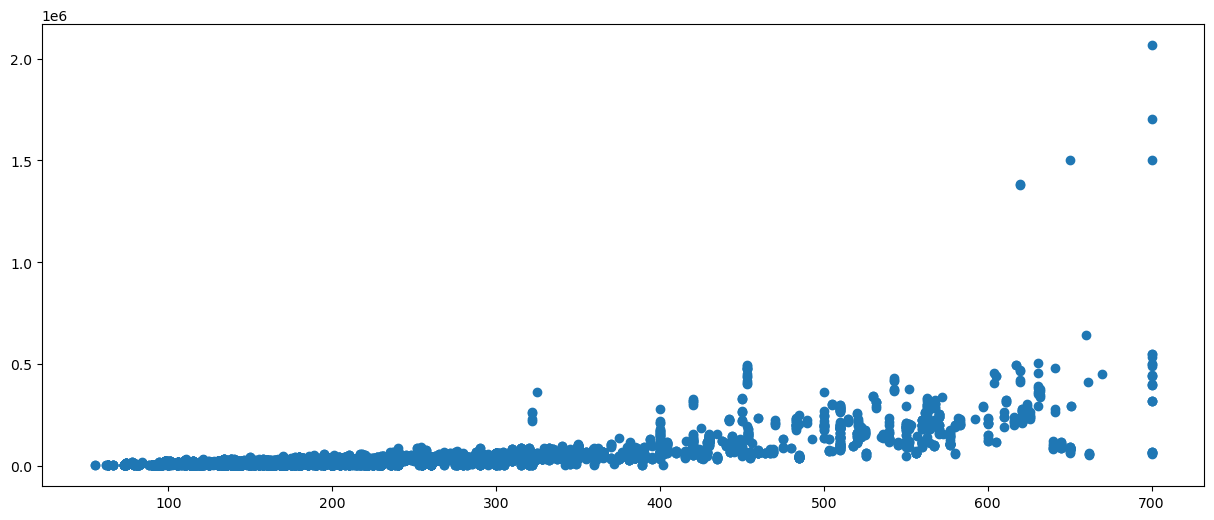

In [857]:
data["Engine HP"] = np.where(data["Engine HP"] > 700, 700, data["Engine HP"])
plt.figure(figsize=(15,6))
plt.scatter(x =data["Engine HP"],y= data["MSRP"])

<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

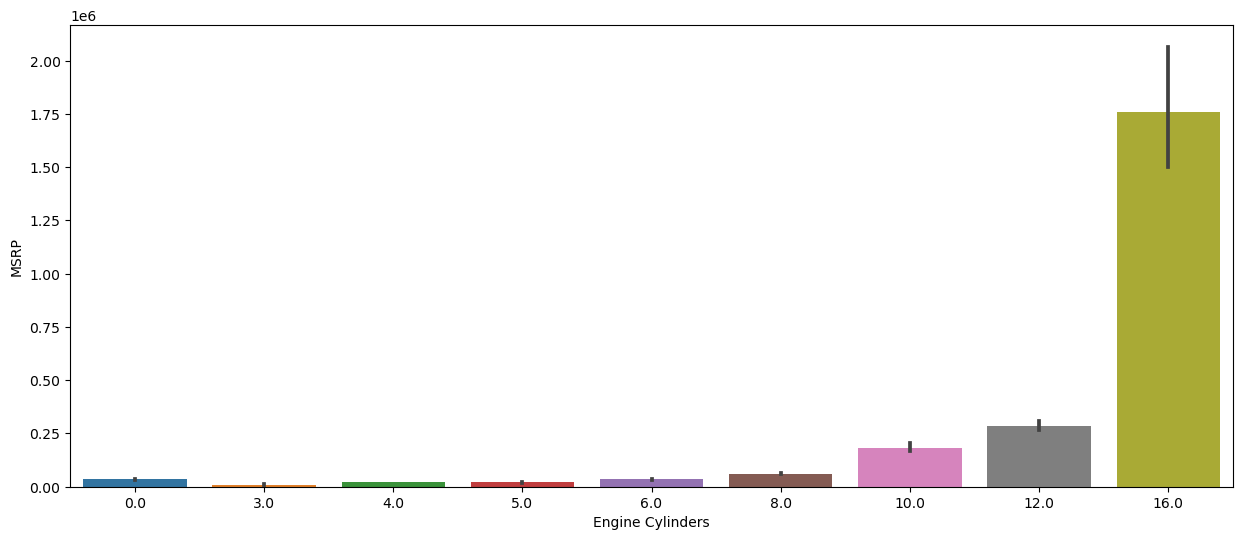

In [858]:
plt.figure(figsize=(15,6))
sns.barplot(x = data["Engine Cylinders"],y=  data["MSRP"])

In [859]:
data["Engine Cylinders"].value_counts().sort_index()

Engine Cylinders
0.0       13
3.0       30
4.0     4743
5.0      225
6.0     4470
8.0     2031
10.0      68
12.0     229
16.0       3
Name: count, dtype: int64

C:\Users\ahmed\AppData\Local\Temp\ipykernel_3368\3176288883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Engine Cylinders"] = np.where(data["Engine Cylinders"] == 16, 12, data["Engine Cylinders"])


<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

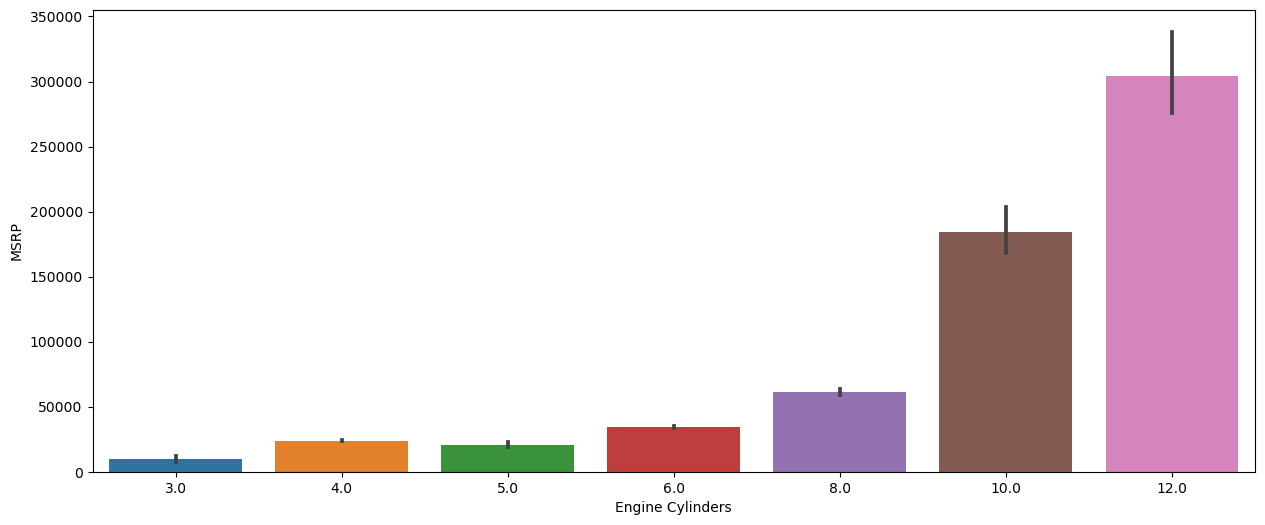

In [860]:
data = data[data["Engine Cylinders"]!= 0]
data["Engine Cylinders"] = np.where(data["Engine Cylinders"] == 16, 12, data["Engine Cylinders"])
plt.figure(figsize=(15,6))
sns.barplot(x = data["Engine Cylinders"],y=  data["MSRP"])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_3368\1977446464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Engine Cylinders"] = np.where(data["Engine Cylinders"] == 5, 4, data["Engine Cylinders"])


<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

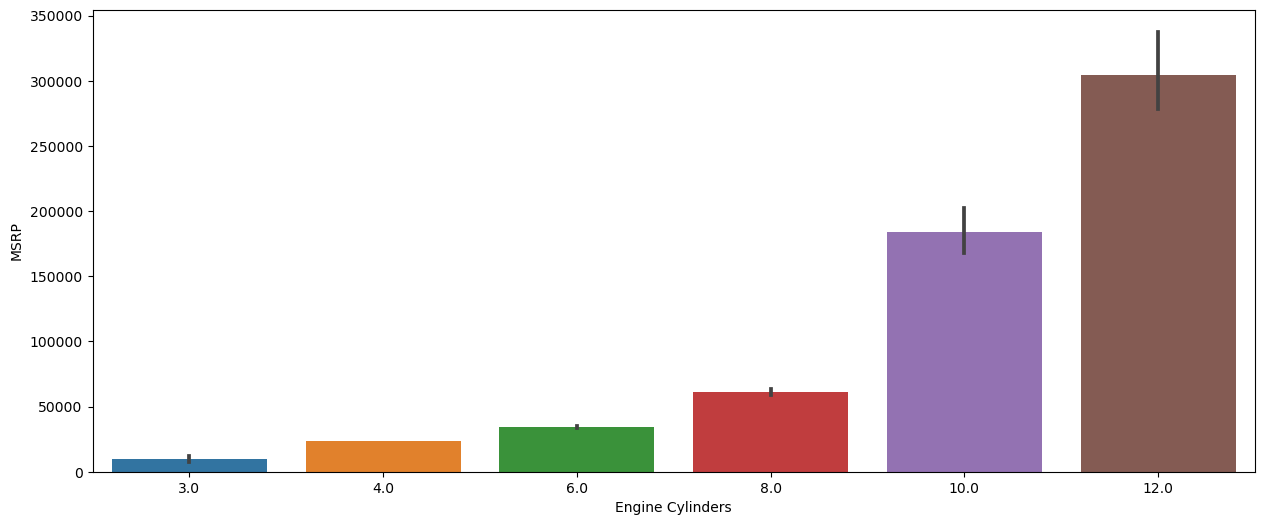

In [861]:
data["Engine Cylinders"] = np.where(data["Engine Cylinders"] == 5, 4, data["Engine Cylinders"])
plt.figure(figsize=(15,6))
sns.barplot(x = data["Engine Cylinders"],y=  data["MSRP"])

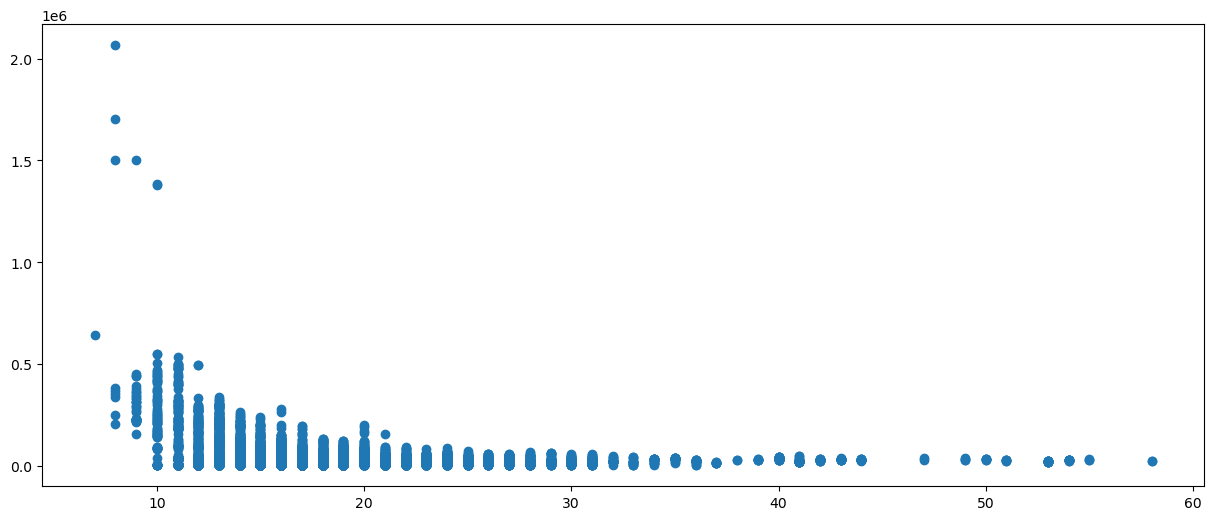

In [862]:
plt.figure(figsize=(15,6))
plt.scatter(data["city mpg"], data["MSRP"])

In [863]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,log_MSRP
count,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,1.179900e+04,11799.000000
mean,2010.355793,249.502331,5.635562,3.431901,26.236461,19.216968,1553.202983,4.056660e+04,10.109699
std,7.596753,108.686878,1.750183,0.883205,6.988186,5.568027,1440.121722,6.031641e+04,1.109143
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03,7.601402
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.098700e+04,9.951706
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04,10.307986
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220000e+04,10.650199
max,2017.000000,700.000000,12.000000,4.000000,354.000000,58.000000,5657.000000,2.065902e+06,14.541078


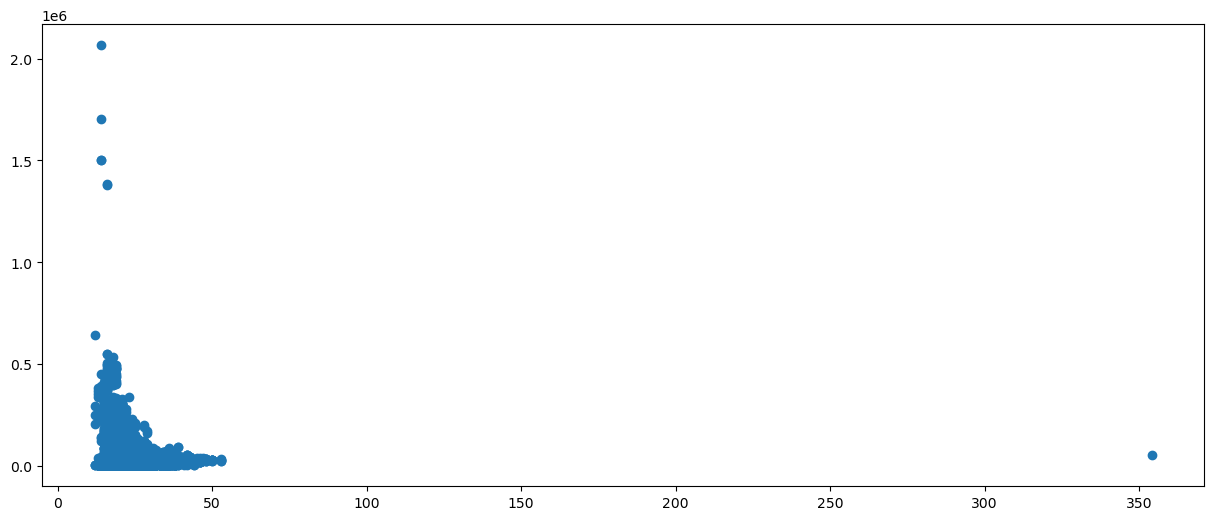

In [864]:
plt.figure(figsize=(15,6))
plt.scatter(data["highway MPG"], data["MSRP"])

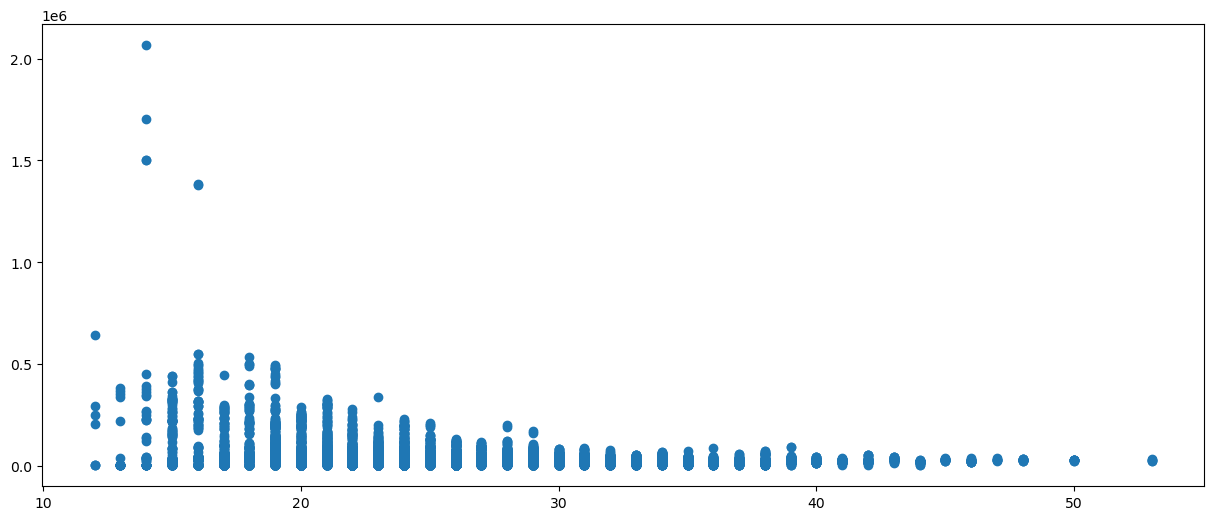

In [865]:
data = data[data["highway MPG"]<100]
plt.figure(figsize=(15,6))
plt.scatter(data["highway MPG"], data["MSRP"])

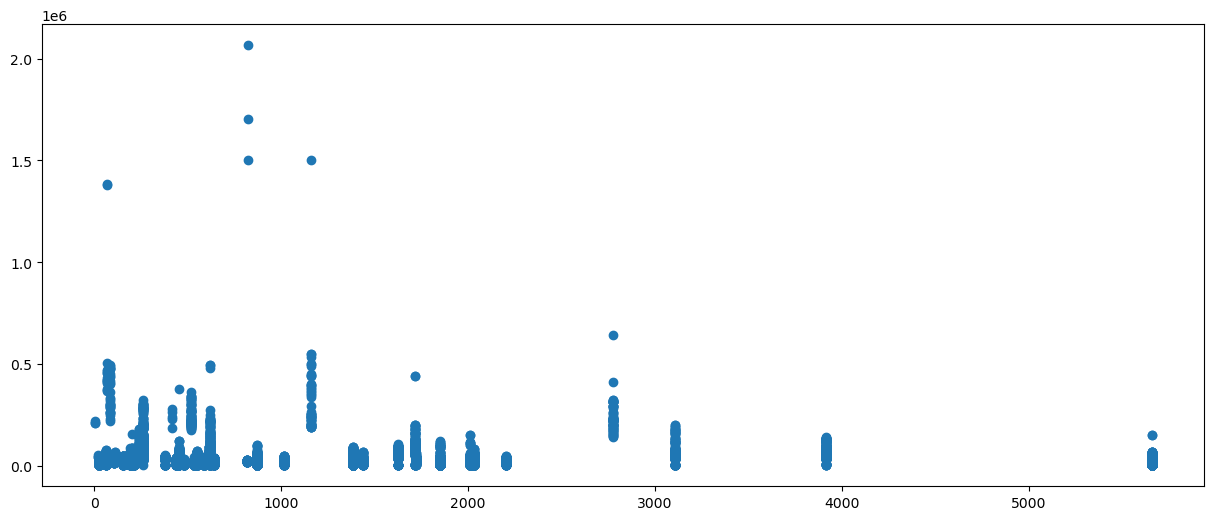

In [866]:
plt.figure(figsize=(15,6))
plt.scatter(data["Popularity"], data["MSRP"])

In [867]:
data.corr(numeric_only=True)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,log_MSRP
Year,1.000000,0.355520,-0.026664,0.262046,0.318106,0.258871,0.073274,0.227453,0.768462
Engine HP,0.355520,1.000000,0.780395,-0.100413,-0.478992,-0.530649,0.037301,0.643758,0.680410
Engine Cylinders,-0.026664,0.780395,1.000000,-0.134125,-0.686169,-0.683500,0.051028,0.531470,0.376451
Number of Doors,0.262046,-0.100413,-0.134125,1.000000,0.131504,0.147435,-0.050175,-0.127289,0.105922
highway MPG,0.318106,-0.478992,-0.686169,0.131504,1.000000,0.919980,-0.044442,-0.234448,-0.054974
city mpg,0.258871,-0.530649,-0.683500,0.147435,0.919980,1.000000,-0.021187,-0.262167,-0.105557
Popularity,0.073274,0.037301,0.051028,-0.050175,-0.044442,-0.021187,1.000000,-0.048687,-0.000639
MSRP,0.227453,0.643758,0.531470,-0.127289,-0.234448,-0.262167,-0.048687,1.000000,0.596151
log_MSRP,0.768462,0.680410,0.376451,0.105922,-0.054974,-0.105557,-0.000639,0.596151,1.000000


<Axes: >

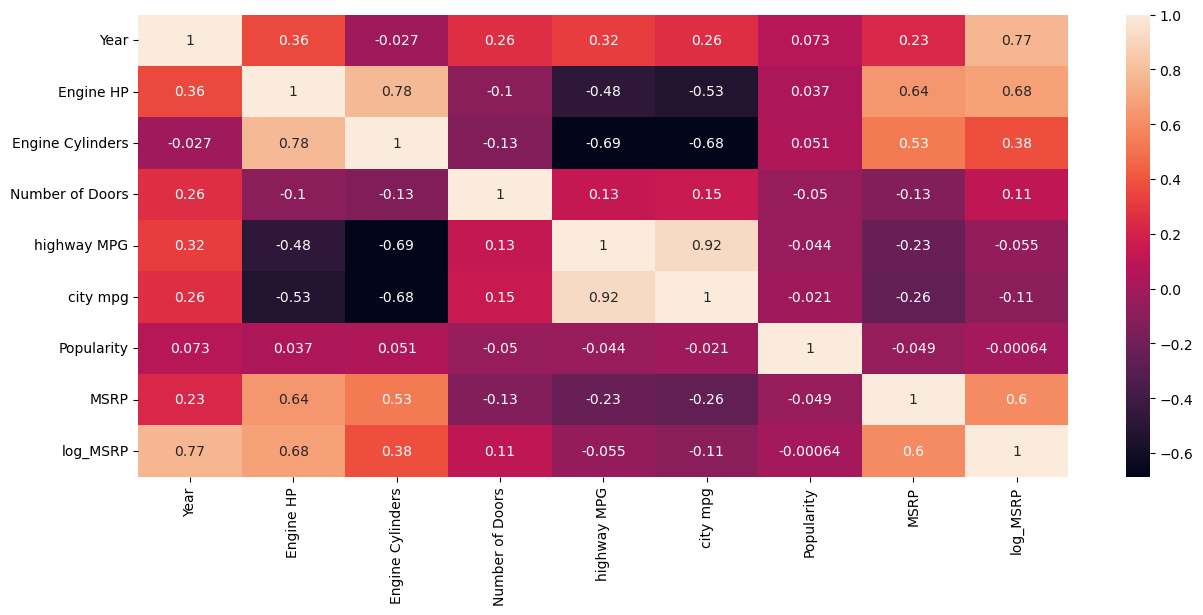

In [868]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [869]:
X = data[["Year", "Engine HP", "Engine Cylinders","city mpg"]]
y = data["log_MSRP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7814773897228184
0.7903718626356628


In [870]:
data.describe(include="object")

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11798,11798,11798,11798,11798,11798,11798
unique,47,901,8,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1109,156,7155,8231,4722,4695,3012


<Axes: xlabel='Vehicle Size', ylabel='MSRP'>

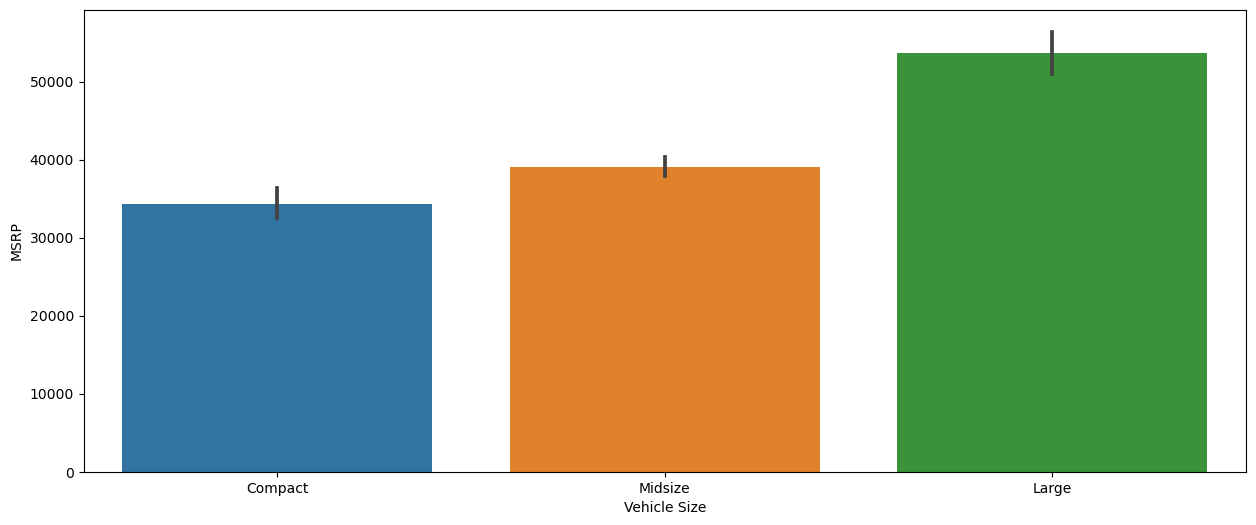

In [871]:
plt.figure(figsize=(15,6))
sns.barplot(x = data["Vehicle Size"], y = data["MSRP"])

In [872]:
data["Vehicle Size"].value_counts()

Vehicle Size
Compact    4695
Midsize    4355
Large      2748
Name: count, dtype: int64

<Axes: xlabel='Vehicle Size', ylabel='MSRP'>

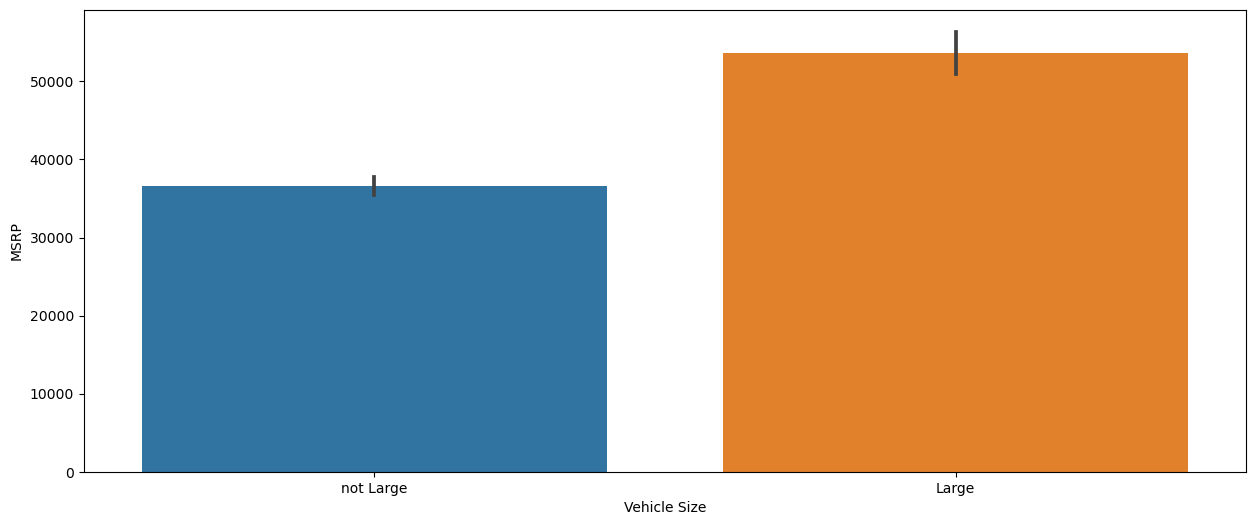

In [873]:
data["Vehicle Size"] = np.where(data["Vehicle Size"] == 'Large', 'Large', "not Large")
plt.figure(figsize=(15,6))
sns.barplot(x = data["Vehicle Size"], y = data["MSRP"])

<Axes: xlabel='Driven_Wheels', ylabel='MSRP'>

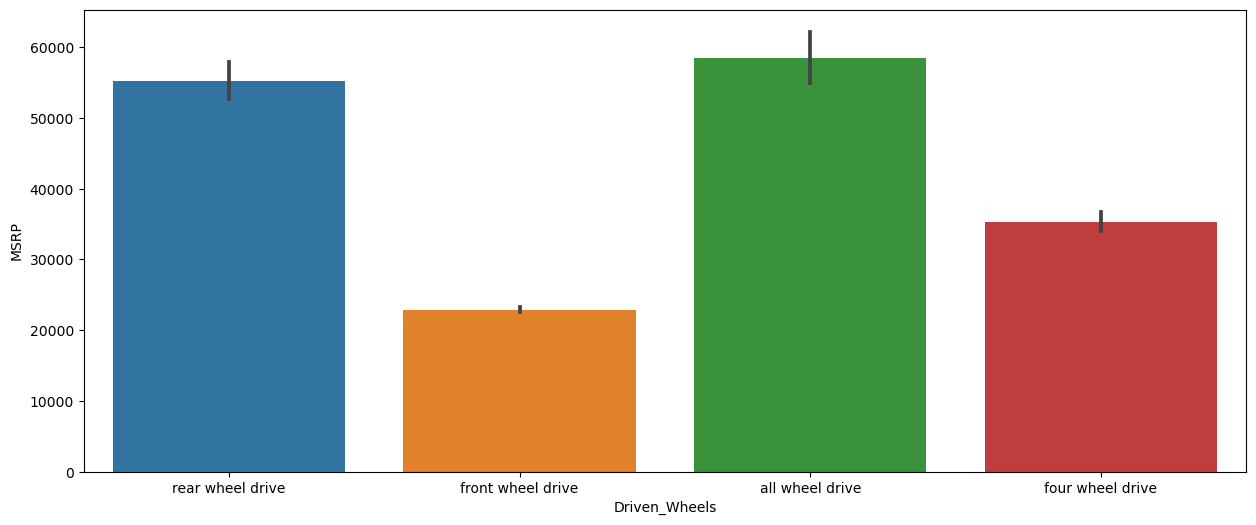

In [874]:
plt.figure(figsize=(15,6))
sns.barplot(x = data["Driven_Wheels"], y = data["MSRP"])

In [875]:
data["Driven_Wheels"].value_counts()

Driven_Wheels
front wheel drive    4722
rear wheel drive     3337
all wheel drive      2336
four wheel drive     1403
Name: count, dtype: int64

<Axes: xlabel='Driven_Wheels', ylabel='MSRP'>

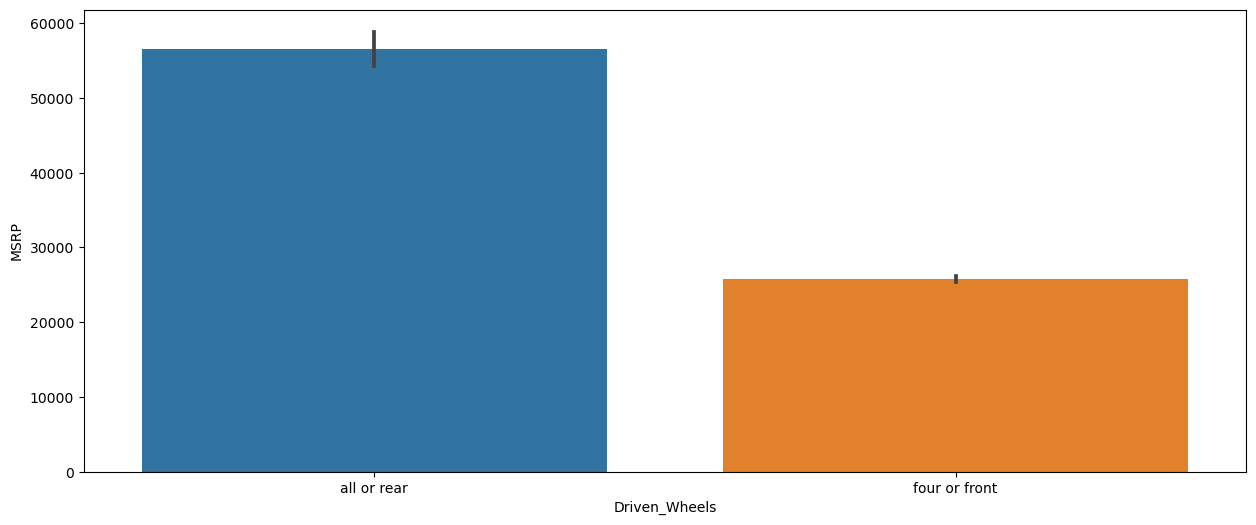

In [876]:
data["Driven_Wheels"] = np.where(data["Driven_Wheels"].isin(["rear wheel drive","all wheel drive"]), "all or rear", "four or front")
plt.figure(figsize=(15,6))
sns.barplot(x = data["Driven_Wheels"], y = data["MSRP"])

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

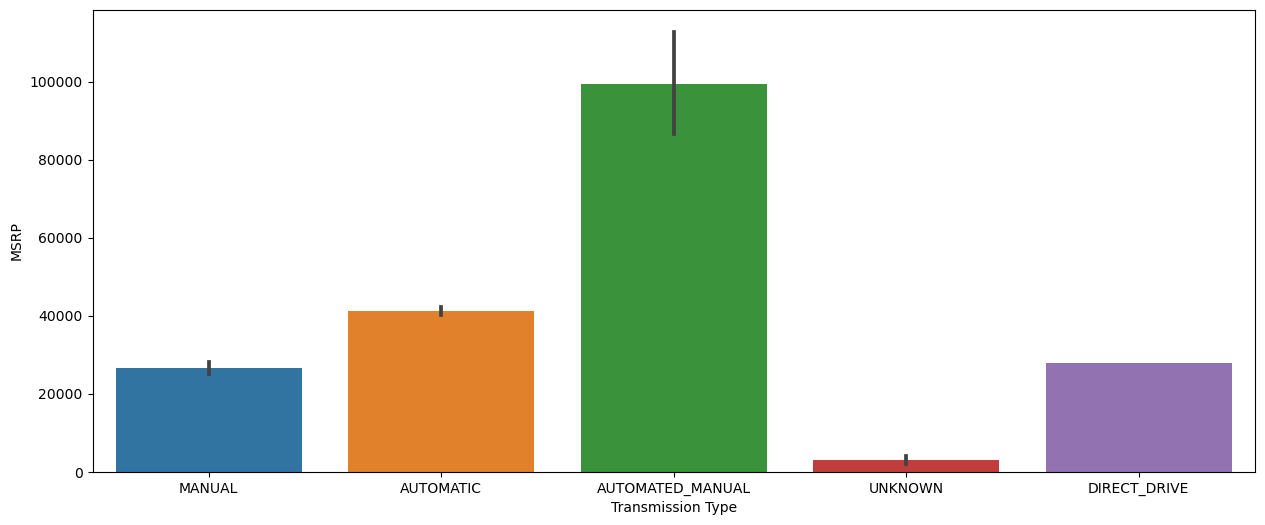

In [877]:
plt.figure(figsize=(15,6))
sns.barplot(x = data["Transmission Type"], y = data["MSRP"])

In [878]:
data["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           8231
MANUAL              2922
AUTOMATED_MANUAL     624
UNKNOWN               19
DIRECT_DRIVE           2
Name: count, dtype: int64

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

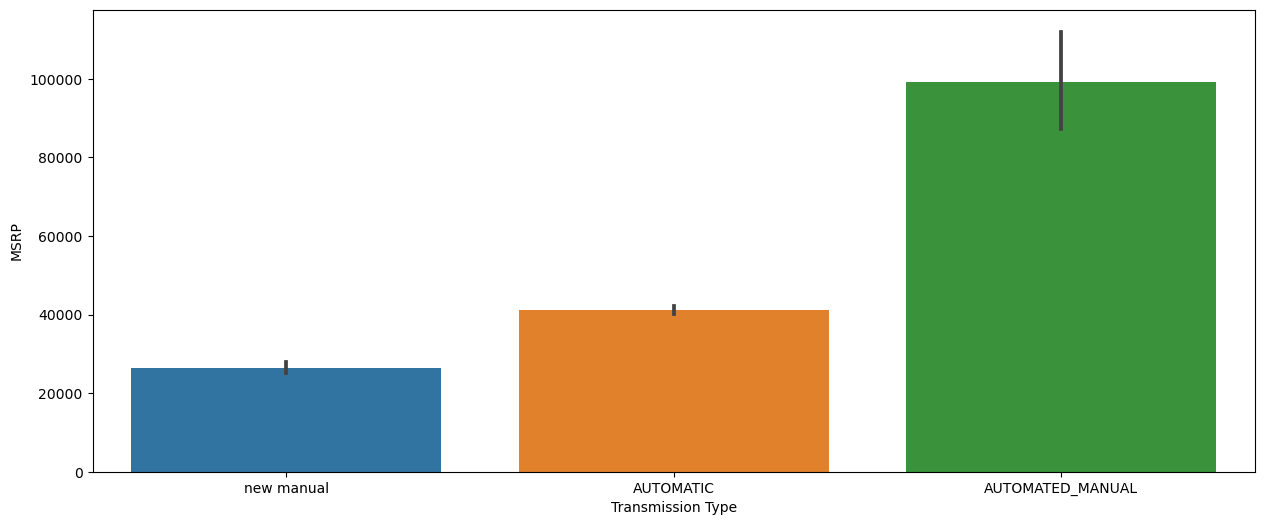

In [879]:
data["Transmission Type"] = np.where(data["Transmission Type"].isin(["MANUAL", "UNKNOWN","DIRECT_DRIVE"]), "new manual", data["Transmission Type"])
plt.figure(figsize=(15,6))
sns.barplot(x = data["Transmission Type"], y = data["MSRP"])

<Axes: xlabel='Engine Fuel Type', ylabel='MSRP'>

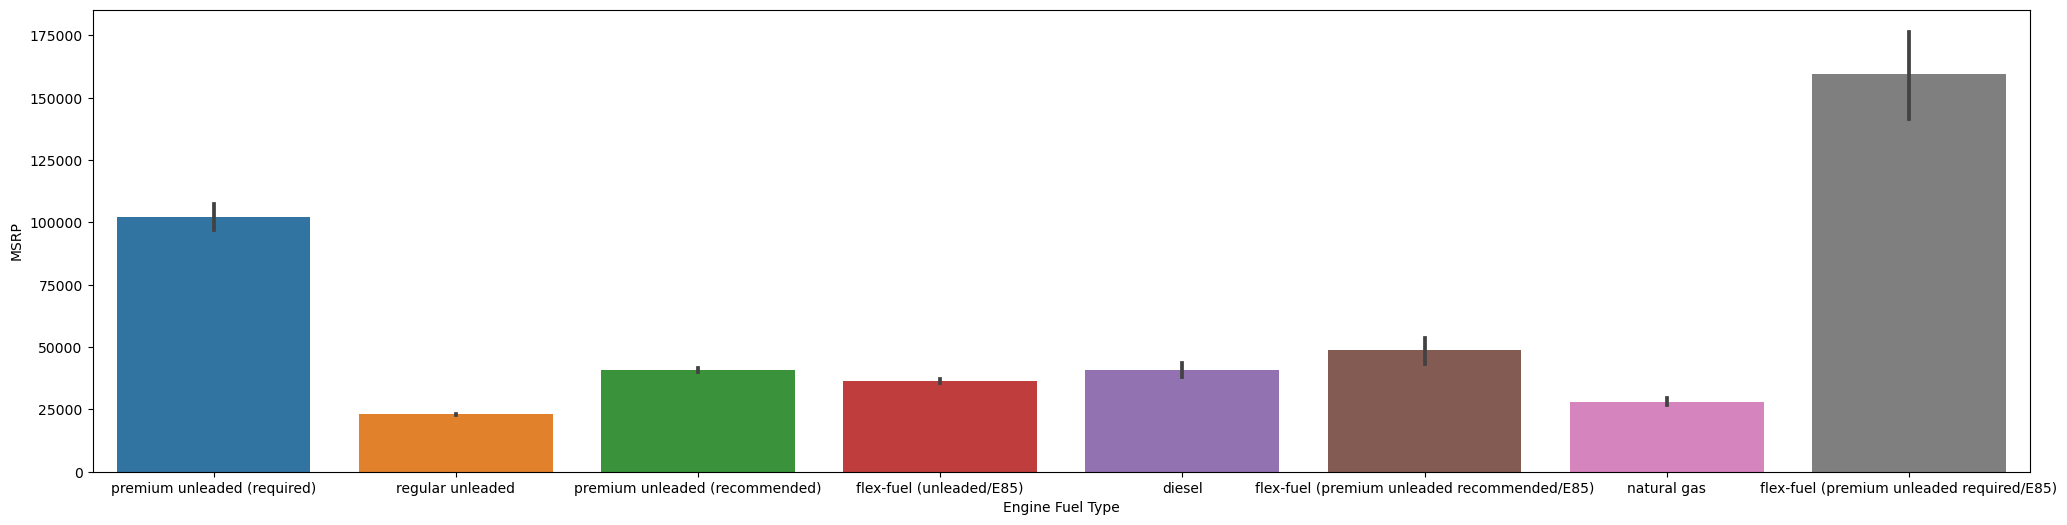

In [880]:
plt.figure(figsize=(25,6))
sns.barplot(x = data["Engine Fuel Type"], y = data["MSRP"])

In [881]:
data["Engine Fuel Type"].value_counts()

Engine Fuel Type
regular unleaded                                7155
premium unleaded (required)                     1991
premium unleaded (recommended)                  1518
flex-fuel (unleaded/E85)                         899
diesel                                           153
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
natural gas                                        2
Name: count, dtype: int64

<Axes: xlabel='Engine Fuel Type', ylabel='MSRP'>

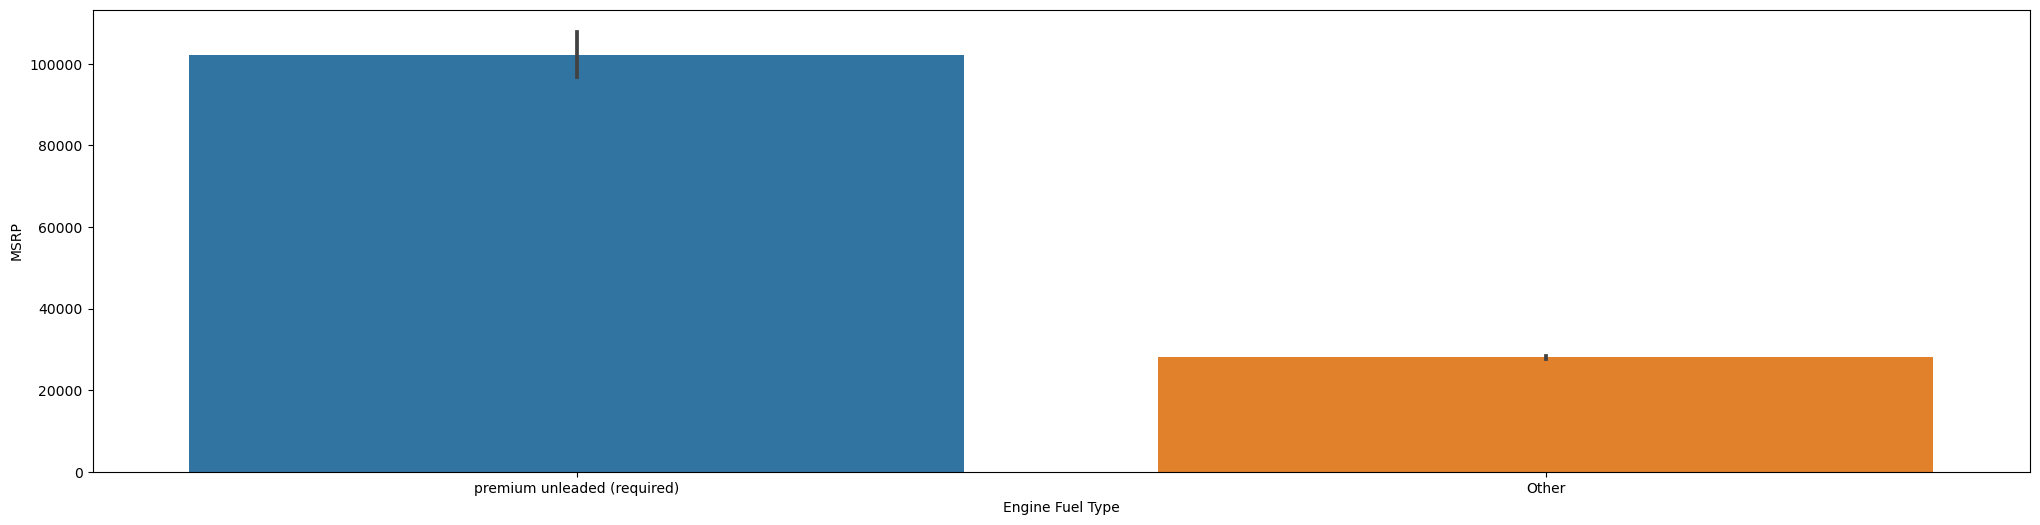

In [882]:
data["Engine Fuel Type"] = np.where(data["Engine Fuel Type"] == "premium unleaded (required)", "premium unleaded (required)", "Other")
plt.figure(figsize=(25,6))
sns.barplot(x = data["Engine Fuel Type"], y = data["MSRP"])

<Axes: xlabel='Vehicle Style', ylabel='MSRP'>

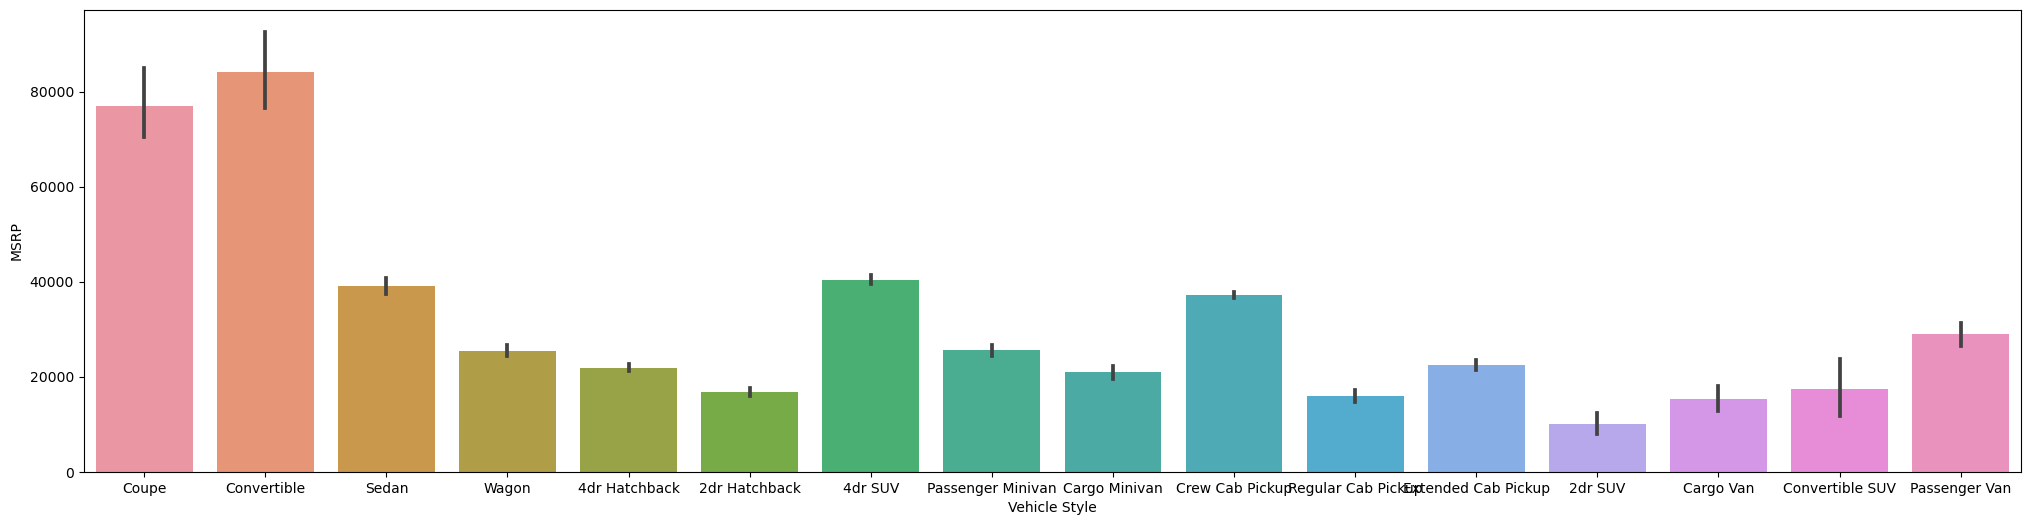

In [883]:
plt.figure(figsize=(25,6))
sns.barplot(x = data["Vehicle Style"], y = data["MSRP"])

<Axes: xlabel='Make', ylabel='MSRP'>

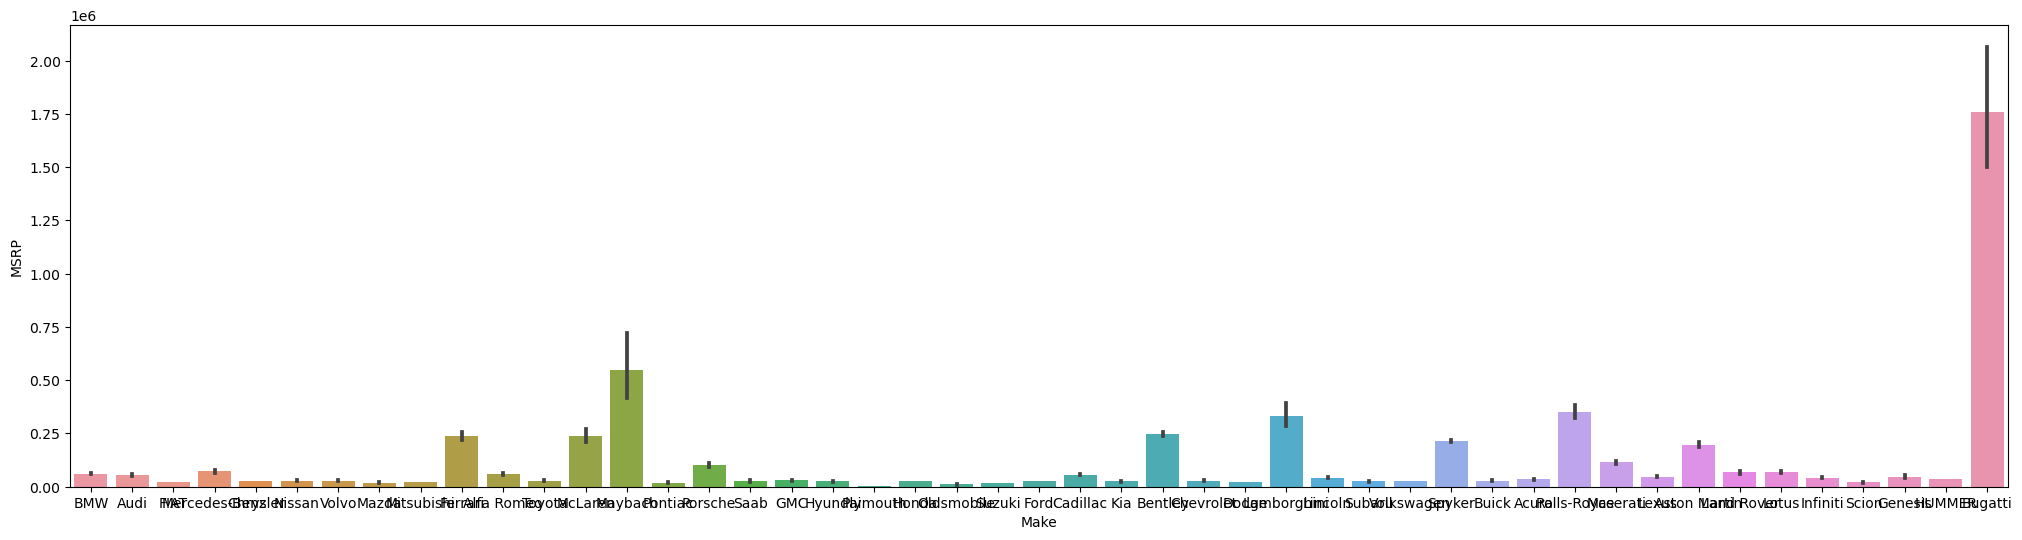

In [884]:
plt.figure(figsize=(25,6))
sns.barplot(x = data["Make"], y = data["MSRP"])

<Axes: xlabel='Model', ylabel='MSRP'>

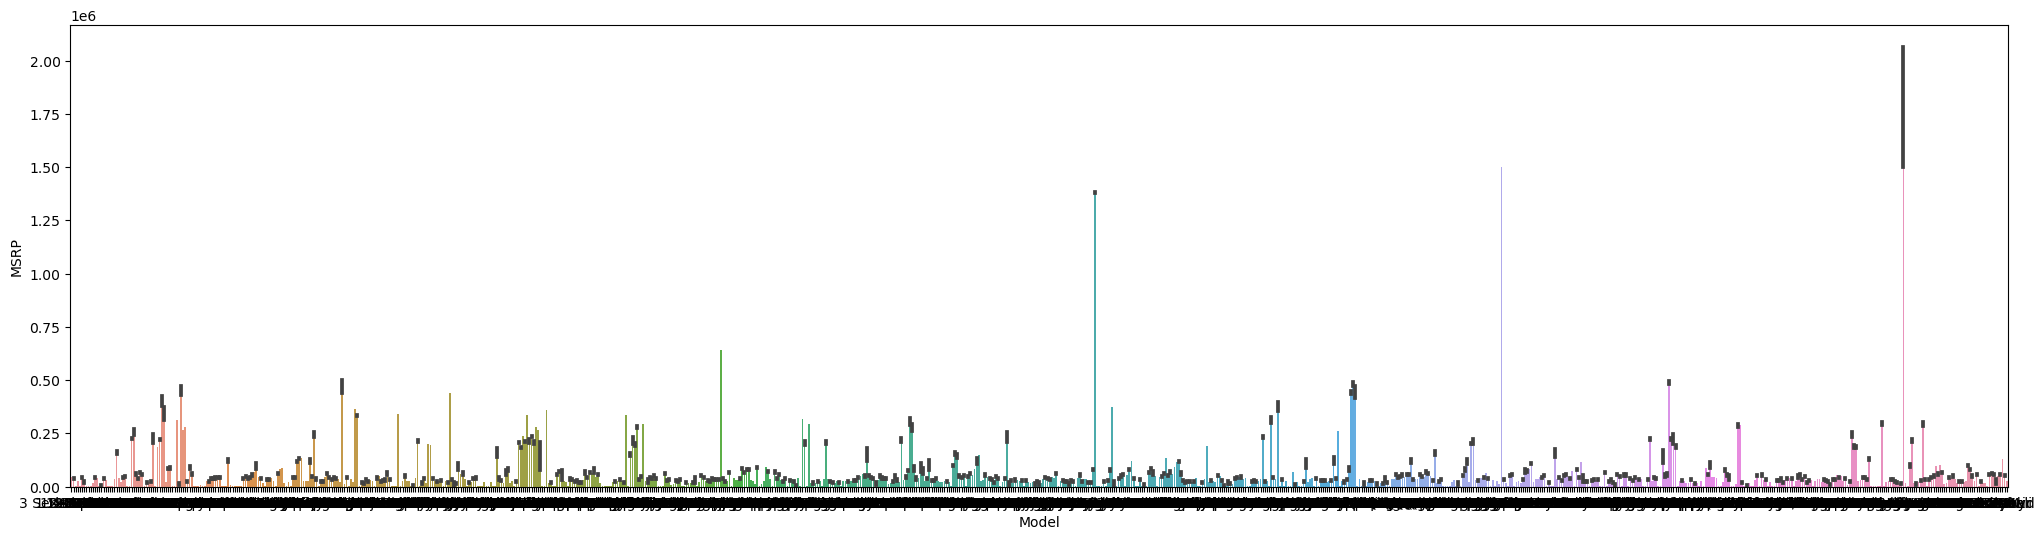

In [885]:
plt.figure(figsize=(25,6))
sns.barplot(x = data["Model"], y = data["MSRP"])

In [886]:
data.describe(include="object")

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11798,11798,11798,11798,11798,11798,11798
unique,47,901,2,3,2,2,16
top,Chevrolet,Silverado 1500,Other,AUTOMATIC,four or front,not Large,Sedan
freq,1109,156,9807,8231,6125,9050,3012


In [ ]:
poly = PolynomialFeatures()


In [898]:
X = data[["Year", "Engine HP", "Engine Cylinders","city mpg","Vehicle Size","Driven_Wheels","Transmission Type","Engine Fuel Type","Vehicle Style","Make"]]
y = data["log_MSRP"]
X = pd.get_dummies(data = X, columns=["Vehicle Size","Driven_Wheels","Transmission Type","Engine Fuel Type","Vehicle Style","Make"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train

,Year,Engine HP,Engine Cylinders,city mpg,Vehicle Size_Large,Vehicle Size_not Large,Driven_Wheels_all or rear,Driven_Wheels_four or front,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,...,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo
10211,2016,159.0,4.0,19,False,True,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5940,2001,140.0,4.0,22,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8534,1999,240.0,6.0,16,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9254,2007,295.0,8.0,14,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7394,2017,166.0,4.0,24,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,2002,127.0,4.0,20,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5224,2013,570.0,10.0,13,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5423,2017,292.0,4.0,23,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
863,2009,260.0,4.0,17,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False


In [899]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))    
print(model.score(X_test, y_test))

0.8538093115792873
0.8606825243691894
